<a href="https://colab.research.google.com/github/athornton1618/Sandbox/blob/main/MBA_Earning_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Personal Savings + Loans')

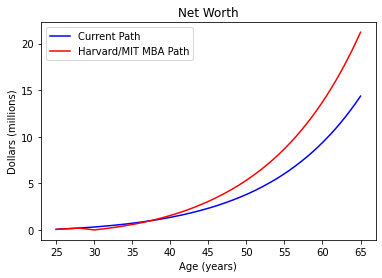

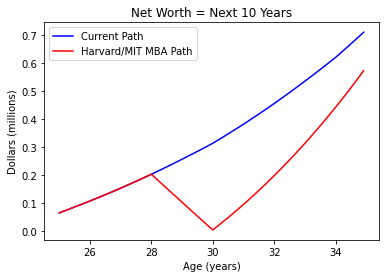

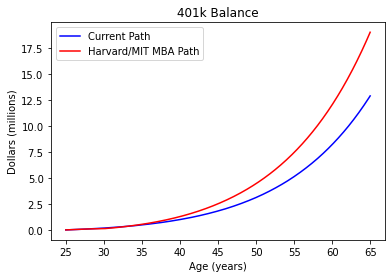

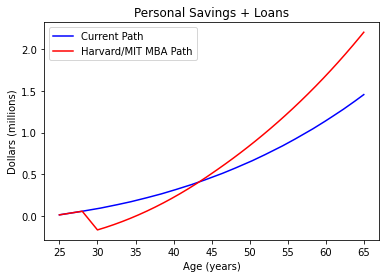

In [22]:
import numpy as np
import matplotlib.pyplot as plt
############# ASSUMPTIONS ###############
#Age assumptions
Current_Age = 25
MBA_Age = 28
Retirement_Age = 65

#Initial Salary assumptions
base_salary = 90200
Total_comp = base_salary*(1.03)

#401k assumptions
Balance_401 = 51000 #initial 401k balance
Annual_ROR = 8 #interest rate for 401k
Personal_401_contribution = 15 #percent
Employer_401_contribution = 10 #percent

#Personal savings assumtions
Personal_savings = 15000 #initial savings
Personal_savings_contribution = 15 #percent of salary saved each year, non 401k

############# COMMON PATH (MBA / Current) ###############

#Common calculation until start of MBA
#Paths diverge in Fall 2024 @ age 28
#Update values / compound monthly
num_months_common = (MBA_Age-Current_Age)*12
num_months_total = (Retirement_Age-Current_Age)*12
common_401 = np.zeros(num_months_total+1)
common_401[0] = Balance_401
common_savings = np.zeros(num_months_total+1)
common_savings[0] = Personal_savings
net_worth = np.zeros(num_months_total+1)
net_worth[0] = common_savings[0] + common_401[0]

for month in range(1,num_months_common+1):
    common_401[month] = common_401[month-1]*(1+ Annual_ROR/(12*100)) + (Personal_401_contribution/100)*Total_comp/12 + (Employer_401_contribution/100)*Total_comp/12
    common_savings[month] = common_savings[month-1] + (Personal_savings_contribution/100)*Total_comp/12
    net_worth[month] = common_savings[month] + common_401[month]

    if (month % 12 == 0): #update salary each year by 3%
        base_salary = base_salary*(1.03)
        Total_comp = base_salary*(1.03)

#print(common_401)
#print(common_savings)

############# STAY WITH CURRENT PATH ###############
#Assumptions
Promotion_every = 4 #promotion every 4 years
Promotion_amount = 15000 

num_months = num_months_total - num_months_common

current_path_401 = np.copy(common_401)
current_path_savings = np.copy(common_savings)
current_path_net_worth = np.copy(net_worth)

for month in range(num_months_common+1,num_months_total+1):
    current_path_401[month] = current_path_401[month-1]*(1+ Annual_ROR/(12*100)) + (Personal_401_contribution/100)*Total_comp/12 + (Employer_401_contribution/100)*Total_comp/12
    current_path_savings[month] = current_path_savings[month-1] + (Personal_savings_contribution/100)*Total_comp/12
    current_path_net_worth[month] = current_path_401[month] + current_path_savings[month]

    if (month % (Promotion_every*12) == 0): #update salary
        base_salary += Promotion_amount
    elif (month % 12 == 0):
        base_salary = base_salary*(1.03)
        Total_comp = base_salary*(1.03)

############# CHOOSE MBA ###############
#MBA assumptions
Annual_MBA_Total_Cost = 111818 #https://poetsandquants.com/2020/11/30/what-a-harvard-mba-now-costs-2/?pq-category=business-school-news&pq-category-2=financing-your-mba
base_salary = 150000
starting_salary = (base_salary)*1.2 #big bonus for MBA, 30k typical for 150k

MBA_path_401 = np.copy(common_401)
MBA_path_savings = np.copy(common_savings)
MBA_path_net_worth = np.copy(net_worth)

end_MBA = 2*12 + num_months_common+1 #2 year full time MBA

#During MBA, losing money
for month in range(num_months_common+1,end_MBA):
    MBA_path_401[month] = MBA_path_401[month-1]*(1+ Annual_ROR/(12*100)) #Accumulates interest, no contributions
    MBA_path_savings[month] = MBA_path_savings[month-1] - 111818/12
    MBA_path_net_worth[month] = MBA_path_401[month] + MBA_path_savings[month]

#Post MBA to  10 years out -> https://www.reddit.com/r/MBA/comments/ipvy7l/what_are_salaries_like_10_years_post_mba/
mid_career_base_salary = 350000 #Approximate w/ linear increase from initial base to mid career base
years_to_mid_career = 15
Total_comp_MBA = np.linspace(starting_salary,mid_career_base_salary*1.2,years_to_mid_career*12) #reach mid career salary 15 years in
i = 0
for month in range(end_MBA,num_months_total+1):
    if i < years_to_mid_career*12: 
        Total_comp = Total_comp_MBA[i]
    elif (i == years_to_mid_career*12):
        Total_comp = Total_comp_MBA[-1] #Reached mid career salary
    elif (i > years_to_mid_career*12 and i % 12 == 0):
        Total_comp = Total_comp*1.03 #3% raise each year

    MBA_path_401[month] = MBA_path_401[month-1]*(1+ Annual_ROR/(12*100)) + (Personal_401_contribution/100)*Total_comp/12 + (Employer_401_contribution/100)*Total_comp/12
    MBA_path_savings[month] = MBA_path_savings[month-1] + (Personal_savings_contribution/100)*Total_comp/12
    MBA_path_net_worth[month] = MBA_path_401[month] + MBA_path_savings[month]
    i+=1


############# ANALYSIS ###############

age = np.arange(0,num_months_total+1)/12 + Current_Age

age_next_10 = np.arange(0,10*12)/12 + Current_Age

fig = plt.figure()
plt.plot(age,current_path_net_worth/1e6,'b',label="Current Path")
plt.plot(age,MBA_path_net_worth/1e6,'r',label="Harvard/MIT MBA Path")
plt.xlabel("Age (years)")
plt.ylabel("Dollars (millions)")
plt.legend()
plt.title("Net Worth")

fig = plt.figure()
plt.plot(age_next_10,current_path_net_worth[0:len(age_next_10)]/1e6,'b',label="Current Path")
plt.plot(age_next_10,MBA_path_net_worth[0:len(age_next_10)]/1e6,'r',label="Harvard/MIT MBA Path")
plt.xlabel("Age (years)")
plt.ylabel("Dollars (millions)")
plt.legend()
plt.title("Net Worth = Next 10 Years")

fig = plt.figure()
plt.plot(age,current_path_401/1e6,'b',label="Current Path")
plt.plot(age,MBA_path_401/1e6,'r',label="Harvard/MIT MBA Path")
plt.xlabel("Age (years)")
plt.ylabel("Dollars (millions)")
plt.legend()
plt.title("401k Balance")

fig = plt.figure()
plt.plot(age,current_path_savings/1e6,'b',label="Current Path")
plt.plot(age,MBA_path_savings/1e6,'r',label="Harvard/MIT MBA Path")
plt.xlabel("Age (years)")
plt.ylabel("Dollars (millions)")
plt.legend()
plt.title("Personal Savings + Loans")